## PCA based data distribution visualisation

In [63]:
from PIL import Image
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
img_dir_list = ['PIE/PIE/1/*.jpg', 'PIE/PIE/2/*.jpg', 'PIE/PIE/3/*.jpg', \
               'PIE/PIE/4/*.jpg', 'PIE/PIE/5/*.jpg', 'PIE/PIE/6/*.jpg', \
               'PIE/PIE/7/*.jpg', 'PIE/PIE/8/*.jpg', 'PIE/PIE/9/*.jpg', \
               'PIE/PIE/10/*.jpg', 'PIE/PIE/11/*.jpg', 'PIE/PIE/12/*.jpg', \
               'PIE/PIE/13/*.jpg', 'PIE/PIE/14/*.jpg', 'PIE/PIE/15/*.jpg', \
               'PIE/PIE/16/*.jpg', 'PIE/PIE/17/*.jpg', 'PIE/PIE/18/*.jpg', \
               'PIE/PIE/19/*.jpg', 'PIE/PIE/20/*.jpg']
image_list = []
image_own = []
image_list_unflattened = []
train_list = []
train_own = []
test_list = []
test_own = []

for i in range (0, 20):
    temp_list = []
    temp_list_unflattened = []
    for filename in glob.glob(img_dir_list[i]):
        im = Image.open(filename)
        arr = np.array(im).flatten()
        image_list_unflattened.append(np.array(im))
        image_list.append(arr)
for filename in glob.glob('own_pic/*.jpg'):
    im = Image.open(filename)
    arr = np.array(im).flatten()
    image_own.append(arr)
    
image_list = np.asarray(image_list)
image_own = np.asarray(image_own)
image_list_unflattened = np.asarray(image_list_unflattened)

train_list, test_list = train_test_split(image_list, test_size = 0.3)
train_list = np.asarray(train_list)
test_list = np.asarray(test_list)
train_own, test_own = train_test_split(image_own, test_size = 0.3)
train_own = np.asarray(train_own)
test_own = np.asarray(test_own)

random_indices = np.arange(0, train_list.shape[0])
np.random.shuffle(random_indices)
train_sample = train_list[random_indices[:500]]
for i in range (0, train_own.shape[0]):
    train_sample.append(train_own[i])

In [17]:
train_sample.shape

(500, 1024)

In [29]:
train_image_mean = (np.mean(train_sample, axis = 0)).astype('float')
print(train_image_mean)
print(train_image_mean.shape)

[37.182 41.916 48.648 ... 45.916 47.93  52.27 ]
(1024,)


(21, 1024)


In [44]:
def pca (image_list):
    image_mean = train_image_mean
    image_diff = []
#     for i in range (0, 21):
#         temp_diff = []
    image_diff = image_list - image_mean
    image_diff = np.asarray(image_diff)
    covariance = np.cov(image_diff.T)
#         print(covariance.shape)
    eigenvalue, eigenvector = np.linalg.eig(covariance)
    idx = eigenvalue.argsort()[::-1]
    eigenvalue = eigenvalue[idx]
    eigenvector = eigenvector[:, idx]
    eigenvalue = np.asarray(eigenvalue)
    eigenvector = np.asarray(eigenvector)
#     eigenval_list.append(np.real(np.asarray(eigenvalue)))
#     eigenvec_list.append(np.real(np.asarray(eigenvector)))
#     eigenval_list = np.asarray(eigenval_list)
#     eigenvec_list = np.asarray(eigenvec_list)
    return eigenvalue, eigenvector

In [48]:
eigenvalue_test, eigenvector_test = pca(test_list)
eigenvalue_train, eigenvector_train = pca(train_list)
eigenvalue_test_own, eigenvector_test_own = pca(test_own)
eigenvalue_train_own, eigenvector_train_own = pca(train_own)

1071


In [46]:
print(eigenvec_list)
print(eigenval_list)
print(eigenval_list.shape)
print(eigenvec_list.shape)

[[ 0.00690638 -0.02112421  0.01353074 ...  0.00420477  0.00016923
  -0.00479454]
 [ 0.00924157 -0.02686265  0.01776681 ... -0.01338853 -0.01561136
  -0.00397491]
 [ 0.01231197 -0.03049333  0.01999985 ...  0.0089513   0.01921116
  -0.00510599]
 ...
 [ 0.01464674  0.02690405  0.06743218 ... -0.0242435  -0.00336538
   0.0013117 ]
 [ 0.01437894  0.02111972  0.07163715 ...  0.01998597  0.01524509
   0.00718498]
 [ 0.01607924  0.01865231  0.07879247 ... -0.00380765 -0.00422081
  -0.0094521 ]]
[1.04607627e+06 6.76934205e+05 1.79107260e+05 ... 5.05513379e-04
 4.35187646e-04 3.95525950e-04]
(1024,)
(1024, 1024)


In [49]:
print(train_list - train_image_mean)

[[ 45.818  22.084  36.352 ... -41.916 -40.93  -47.27 ]
 [100.818  78.084  86.352 ... -38.916 -36.93  -46.27 ]
 [-30.182   6.084 -22.648 ... -32.916 -35.93  -42.27 ]
 ...
 [-17.182 -21.916 -35.648 ...   6.084  13.07   23.73 ]
 [ 78.818  91.084  78.352 ... -37.916 -39.93  -47.27 ]
 [-27.182 -29.916 -31.648 ...  -8.916 -38.93  -34.27 ]]


include 41 features for 95% threshold


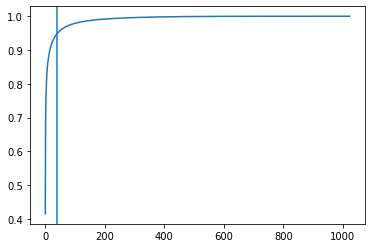

In [47]:
feature_fraction = np.cumsum(eigenval_list)/np.sum(eigenval_list)
threshold = np.argmin(np.abs(feature_fraction - 0.95))
print('include {} features for 95% threshold'.format(threshold))
plt.figure()
plt.plot(feature_fraction)
plt.axvline(threshold)
plt.show()

In [50]:
def reduce_dim(image, eigenvector, dim):
    image_mean = train_image_mean
    image_diff = image - image_mean
    image_diff = np.asarray(image_diff)
    eigenvector_trans = eigenvector.T[:dim]
    print(eigenvector_trans.shape)
    return np.dot(eigenvector_trans, image_diff.T)

In [56]:
test_2_dim = reduce_dim(test_list, eigenvec_list, 2)
print(test_2_dim.shape)

(2, 1024)
(2, 1071)


<function matplotlib.pyplot.show(*args, **kw)>

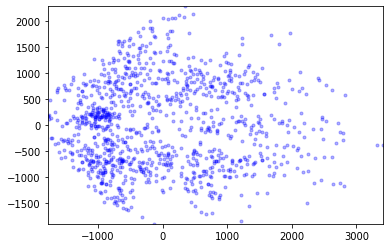

In [59]:
plt.figure()
plt.scatter(test_2_dim[0], test_2_dim[1], c = 'b', marker = '.', alpha = 0.3)
plt.xlim(np.min(test_2_dim[0]), np.max(test_2_dim[0]))
plt.ylim(np.min(test_2_dim[1]), np.max(test_2_dim[1]))
plt.show()

In [61]:
test_3_dim = reduce_dim(test_list, eigenvec_list, 3)

(3, 1024)


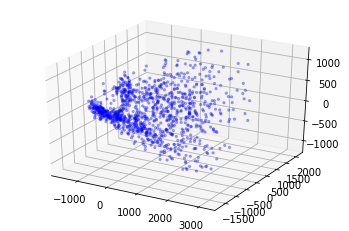

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(test_3_dim[0], test_3_dim[1], test_3_dim[2], c = 'b', marker = '.', alpha = 0.3)
ax.set_xlim(np.min(test_3_dim[0]), np.max(test_3_dim[0]))
ax.set_ylim(np.min(test_3_dim[1]), np.max(test_3_dim[1]))
ax.set_zlim(np.min(test_3_dim[2]), np.max(test_3_dim[2]))
plt.show()

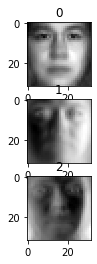

In [74]:
fig, ax = plt.subplots(3, 1, figsize = (8, 4))
for i in range (3):
    ax[i].imshow((eigenvec_list.T[i]).reshape(32, 32), cmap = 'gray')
    ax[i].set_title(i)
plt.show()